<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/12w_A_mon_0602_easy_ch10_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pivot연습

In [49]:
import pandas as pd

# 예제 데이터프레임
df = pd.DataFrame({
    'date': ['2025-01-01','2025-01-01','2025-01-02','2025-01-02'],
    'city': ['Seoul','Busan','Seoul','Busan'],
    'temperature': [-5, 3, -3, 4]
})
print("원본 DataFrame:")
print(df)


원본 DataFrame:
         date   city  temperature
0  2025-01-01  Seoul           -5
1  2025-01-01  Busan            3
2  2025-01-02  Seoul           -3
3  2025-01-02  Busan            4


In [50]:
# pivot 적용
pivoted = df.pivot(index='date', columns='city', values='temperature')
print("\nPivot 결과:")
print(pivoted)



Pivot 결과:
city        Busan  Seoul
date                    
2025-01-01      3     -5
2025-01-02      4     -3


In [51]:
import pandas as pd
import numpy as np

# 중복 데이터가 있는 예제
df2 = pd.DataFrame({
    'date': ['2025-01-01','2025-01-01','2025-01-01','2025-01-02','2025-01-02'],
    'city': ['Seoul','Seoul','Busan','Seoul','Busan'],
    'temperature': [ -5, -4, 3, -3, 4],
    'humidity':    [ 30, 35, 50, 40, 45]
})
print("원본 DataFrame:")
print(df2)


원본 DataFrame:
         date   city  temperature  humidity
0  2025-01-01  Seoul           -5        30
1  2025-01-01  Seoul           -4        35
2  2025-01-01  Busan            3        50
3  2025-01-02  Seoul           -3        40
4  2025-01-02  Busan            4        45


In [52]:
# pivot_table 적용 (기본 aggfunc='mean')
pt_mean = df2.pivot_table(index='date', columns='city',
                          values='temperature')
print("\nTemperature 평균 피벗 테이블:")
print(pt_mean)



Temperature 평균 피벗 테이블:
city        Busan  Seoul
date                    
2025-01-01    3.0   -4.5
2025-01-02    4.0   -3.0


In [53]:
# 다중 values, 집계 함수 변경, NaN 채우기
pt_multi = df2.pivot_table(
    index='date', columns='city',
    values=['temperature','humidity'],
    aggfunc={'temperature': np.min, 'humidity': np.max},
    fill_value=0,
    margins=True  # 총합/평균 행/열 추가
)
print("\n다중 컬럼 + 사용자 함수 + margins:")
print(pt_multi)



다중 컬럼 + 사용자 함수 + margins:
           humidity           temperature          
city          Busan Seoul All       Busan Seoul All
date                                               
2025-01-01       50    35  50           3    -5  -5
2025-01-02       45    40  45           4    -3  -3
All              50    40  50           3    -5  -5


<ipython-input-53-4d925628835e>:2: FutureWarning: The provided callable <function min at 0x7cc85efb94e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pt_multi = df2.pivot_table(
<ipython-input-53-4d925628835e>:2: FutureWarning: The provided callable <function max at 0x7cc85efb93a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pt_multi = df2.pivot_table(
<ipython-input-53-4d925628835e>:2: FutureWarning: The provided callable <function min at 0x7cc85efb94e0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pt_multi = df2.pivot_table(
<ipython-input-53-4d925628835e>:2: FutureWarning: The provided callable <function max

## 단원10 텍스트 마이닝

In [54]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [55]:
!pip install konlpy

In [56]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [57]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [58]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [59]:
f = open('data/speech_moon.txt', encoding = 'utf-8')
moon = f.read()
f.close()

In [60]:
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

In [61]:
import re
moon = re.sub('[^가-힣]', ' ', moon)
moon

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

In [62]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파!')

['다람쥐', '쳇바퀴', '타고파']

In [63]:
!find / -name NanumGothic.ttf

find: ‘/proc/73/task/73/net’: Invalid argument
find: ‘/proc/73/net’: Invalid argument
/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf


# 12주차 수업

In [64]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [65]:
nouns = hannanum.nouns(moon)
type(nouns)

list

In [66]:
len(nouns)

1413

In [67]:
nouns[:10]

['정권교체', '정치교체', '시대교체', '불비불명', '고사', '남쪽', '언덕', '나뭇가지', '년', '동안']

In [68]:
nouns[-10:]

['마음', '길', '우리나라', '대통령', '우리', '모두', '주인', '진정한', '우리나라', '대통령']

In [69]:
import pandas as pd

df_word = pd.DataFrame({'word': nouns})
df_word.head()

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사


In [70]:
df_word['len'] = df_word['word'].str.len()

df_word.head()

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2


In [71]:
df_word.query('len >= 2')

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [72]:
df_word.query('len == 1')

,word,len
8,년,1
10,새,1
13,끝,1
21,저,1
26,수,1
...,...,...
1388,벽,1
1391,벽,1
1393,벽,1
1396,문,1


In [73]:
df_word = df_word.query('len >= 2')
df_word.sort_values('len')

,word,len
1402,국민,2
1401,나라,2
1399,권력,2
1398,겸손,2
1395,세상,2
...,...,...
1143,기초노령연금,6
1268,군사대결지대,6
173,성적스트레스,6
1055,국가일자리위원회,8


In [74]:
df_word.query('word == "대통령"')

,word,len
39,대통령,3
44,대통령,3
46,대통령,3
65,대통령,3
268,대통령,3
1051,대통령,3
1053,대통령,3
1071,대통령,3
1205,대통령,3
1347,대통령,3


In [75]:
df_freq = df_word.groupby('word', as_index=False).agg(n = ('word','count')).sort_values('n', ascending = False)
df_freq

,word,n
462,일자리,19
153,나라,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
324,석유시대,1
322,서민경제,1
321,서로,1
320,생활임금,1


In [76]:
df_freq.query('word == "대통령"')

,word,n
198,대통령,12


In [77]:
top20 = df_freq.head(20)
top20

,word,n
462,일자리,19
153,나라,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
423,우리나라,10
525,정치,10
304,사회,9


In [78]:
%config InlieBackend.figure_format = 'retina'

In [79]:
!pip install koreanize_matplotlib

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

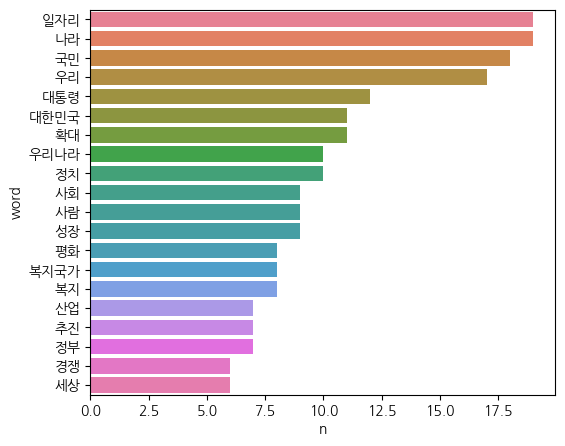

In [81]:
plt.figure(figsize = (6,5))
sns.barplot(data = top20, x = 'n', y = 'word', hue = 'word');

In [82]:
df_freq.head(5)

,word,n
462,일자리,19
153,나라,19
116,국민,18
422,우리,17
198,대통령,12


In [83]:
df_freq.set_index('word')

,n
word,
일자리,19
나라,19
국민,18
우리,17
대통령,12
...,...
석유시대,1
서민경제,1
서로,1


In [85]:
mydf = pd.DataFrame({'col1' : [1,2], 'col2' : [4,5]}, index = ['row1','row2'])
mydf

,col1,col2
row1,1,4
row2,2,5


In [86]:
mydf.to_dict()

{'col1': {'row1': 1, 'row2': 2}, 'col2': {'row1': 4, 'row2': 5}}

In [89]:
df_freq.set_index('word').to_dict()

{'n': {'일자리': 19,
  '나라': 19,
  '국민': 18,
  '우리': 17,
  '대통령': 12,
  '대한민국': 11,
  '확대': 11,
  '우리나라': 10,
  '정치': 10,
  '사회': 9,
  '사람': 9,
  '성장': 9,
  '평화': 8,
  '복지국가': 8,
  '복지': 8,
  '산업': 7,
  '추진': 7,
  '정부': 7,
  '경쟁': 6,
  '세상': 6,
  '교육': 6,
  '보통사람들': 5,
  '상생': 5,
  '정규직': 5,
  '경제': 5,
  '대통령의': 5,
  '공평': 5,
  '때문': 4,
  '모델': 4,
  '희망': 4,
  '강화': 4,
  '기회': 4,
  '고통': 4,
  '아래': 4,
  '사회적': 4,
  '투자': 4,
  '창출': 4,
  '중소기업': 4,
  '전환': 4,
  '정의': 4,
  '주인': 4,
  '담쟁': 4,
  '아이들': 4,
  '요구': 4,
  '여성': 4,
  '약자': 4,
  '역사': 4,
  '결과': 4,
  '개선': 3,
  '특권': 3,
  '활용': 3,
  '경제성장': 3,
  '질서': 3,
  '지방': 3,
  '행복': 3,
  '채택': 3,
  '지원': 3,
  '이명박': 3,
  '사람들': 3,
  '공정': 3,
  '비중': 3,
  '세금': 3,
  '세계': 3,
  '성장전략': 3,
  '소수': 3,
  '양극화': 3,
  '원칙': 3,
  '원전': 3,
  '여러분': 3,
  '에너지': 3,
  '시민': 3,
  '신산업': 3,
  '변화': 3,
  '군대': 3,
  '노인': 3,
  '과도한': 3,
  '관계': 3,
  '부담': 3,
  '문재인': 3,
  '교육혁신': 3,
  '권력': 3,
  '국민들': 3,
  '국가': 3,
  '그것': 3,
  '가지': 3,
  '혁명': 3,
  '혁신':

In [90]:
df_freq.set_index('word').to_dict()['n']

{'일자리': 19,
 '나라': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '우리나라': 10,
 '정치': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '추진': 7,
 '정부': 7,
 '경쟁': 6,
 '세상': 6,
 '교육': 6,
 '보통사람들': 5,
 '상생': 5,
 '정규직': 5,
 '경제': 5,
 '대통령의': 5,
 '공평': 5,
 '때문': 4,
 '모델': 4,
 '희망': 4,
 '강화': 4,
 '기회': 4,
 '고통': 4,
 '아래': 4,
 '사회적': 4,
 '투자': 4,
 '창출': 4,
 '중소기업': 4,
 '전환': 4,
 '정의': 4,
 '주인': 4,
 '담쟁': 4,
 '아이들': 4,
 '요구': 4,
 '여성': 4,
 '약자': 4,
 '역사': 4,
 '결과': 4,
 '개선': 3,
 '특권': 3,
 '활용': 3,
 '경제성장': 3,
 '질서': 3,
 '지방': 3,
 '행복': 3,
 '채택': 3,
 '지원': 3,
 '이명박': 3,
 '사람들': 3,
 '공정': 3,
 '비중': 3,
 '세금': 3,
 '세계': 3,
 '성장전략': 3,
 '소수': 3,
 '양극화': 3,
 '원칙': 3,
 '원전': 3,
 '여러분': 3,
 '에너지': 3,
 '시민': 3,
 '신산업': 3,
 '변화': 3,
 '군대': 3,
 '노인': 3,
 '과도한': 3,
 '관계': 3,
 '부담': 3,
 '문재인': 3,
 '교육혁신': 3,
 '권력': 3,
 '국민들': 3,
 '국가': 3,
 '그것': 3,
 '가지': 3,
 '혁명': 3,
 '혁신': 3,
 '강자': 3,
 '가치': 3,
 '적극적': 2,
 '수명': 2,
 '토대': 2,
 '특권층': 2,
 '수준': 2,
 '과실': 2,
 '선순환'

In [92]:
dic_word = df_freq.set_index('word').to_dict()['n']
dic_word

{'일자리': 19,
 '나라': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '우리나라': 10,
 '정치': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '추진': 7,
 '정부': 7,
 '경쟁': 6,
 '세상': 6,
 '교육': 6,
 '보통사람들': 5,
 '상생': 5,
 '정규직': 5,
 '경제': 5,
 '대통령의': 5,
 '공평': 5,
 '때문': 4,
 '모델': 4,
 '희망': 4,
 '강화': 4,
 '기회': 4,
 '고통': 4,
 '아래': 4,
 '사회적': 4,
 '투자': 4,
 '창출': 4,
 '중소기업': 4,
 '전환': 4,
 '정의': 4,
 '주인': 4,
 '담쟁': 4,
 '아이들': 4,
 '요구': 4,
 '여성': 4,
 '약자': 4,
 '역사': 4,
 '결과': 4,
 '개선': 3,
 '특권': 3,
 '활용': 3,
 '경제성장': 3,
 '질서': 3,
 '지방': 3,
 '행복': 3,
 '채택': 3,
 '지원': 3,
 '이명박': 3,
 '사람들': 3,
 '공정': 3,
 '비중': 3,
 '세금': 3,
 '세계': 3,
 '성장전략': 3,
 '소수': 3,
 '양극화': 3,
 '원칙': 3,
 '원전': 3,
 '여러분': 3,
 '에너지': 3,
 '시민': 3,
 '신산업': 3,
 '변화': 3,
 '군대': 3,
 '노인': 3,
 '과도한': 3,
 '관계': 3,
 '부담': 3,
 '문재인': 3,
 '교육혁신': 3,
 '권력': 3,
 '국민들': 3,
 '국가': 3,
 '그것': 3,
 '가지': 3,
 '혁명': 3,
 '혁신': 3,
 '강자': 3,
 '가치': 3,
 '적극적': 2,
 '수명': 2,
 '토대': 2,
 '특권층': 2,
 '수준': 2,
 '과실': 2,
 '선순환'

In [102]:
from wordcloud import WordCloud
wc = WordCloud(random_state=7777, font_path=FONT_PATH,
               background_color='black',
               width = 600, height = 300)
img_wc = wc.generate_from_frequencies(dic_word)

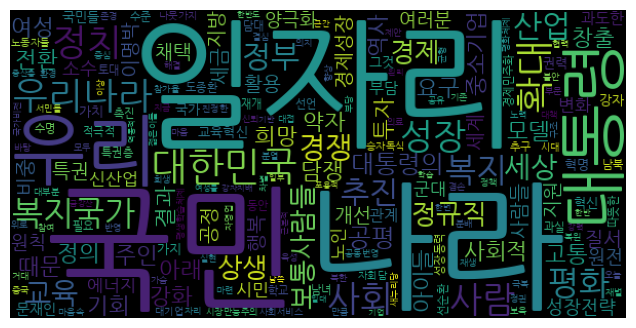

In [103]:
plt.figure(figsize = (10,4))
plt.axis('off')
plt.imshow(img_wc);

In [105]:
from PIL import Image
icon = Image.open('data/cloud.png')

In [106]:
icon.size

(825, 467)

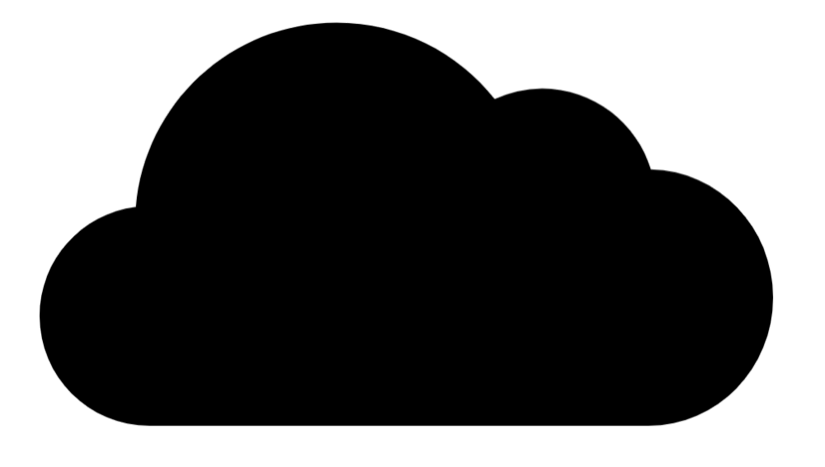

In [109]:
import numpy as np
img = Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
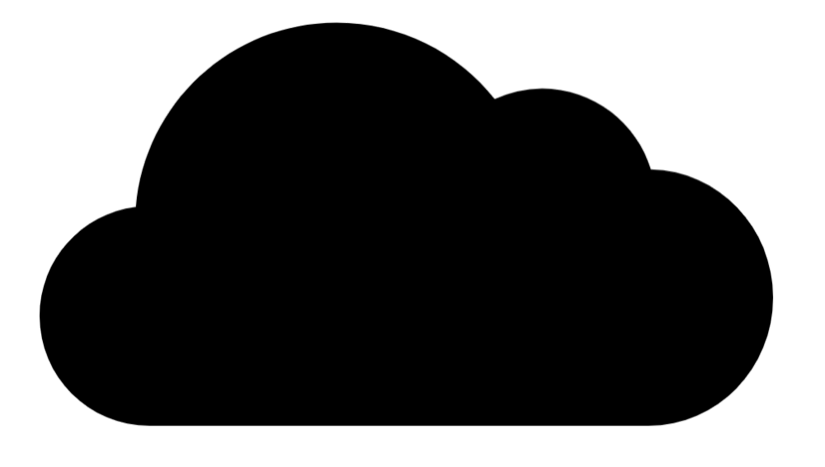

In [112]:
img = np.array(img)
img

In [113]:
wc = WordCloud(random_state=7777, font_path=FONT_PATH,
               background_color='white',
               width = 400, height = 400, mask = img)
img_wc = wc.generate_from_frequencies(dic_word)

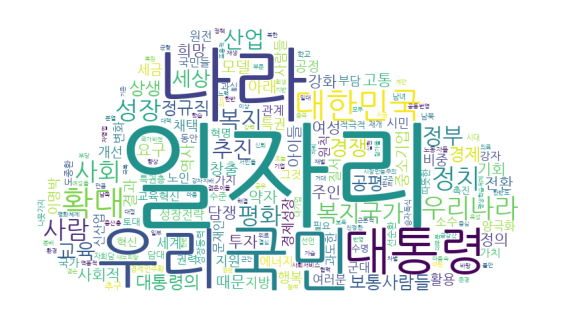

In [115]:
plt.figure(figsize = (10,4))
plt.axis('off')
plt.imshow(img_wc);

In [118]:
wc = WordCloud(random_state=1234, font_path=FONT_PATH,
               background_color='white',
               width = 400, height = 400,
               mask = img,
               colormap = 'inferno')
img_wc = wc.generate_from_frequencies(dic_word)

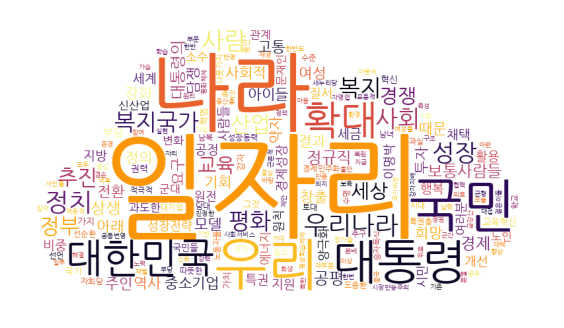

In [119]:
plt.figure(figsize = (10,4))
plt.axis('off')
plt.imshow(img_wc);

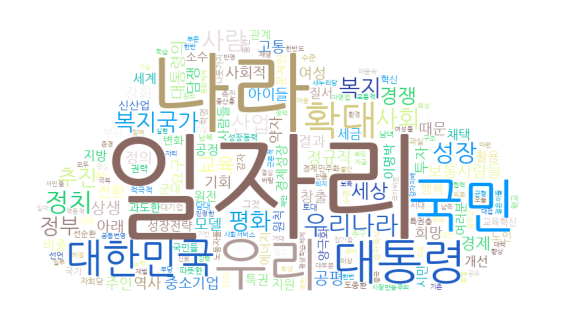

In [126]:
wc = WordCloud(random_state=1234, font_path=FONT_PATH,
               background_color='white',
               width = 400, height = 400,
               mask = img,
               colormap = 'terrain')
img_wc = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10,4))
plt.axis('off')
plt.imshow(img_wc);